In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

dtype = torch.float

In [2]:
n = 20
df = pd.DataFrame()
df['x'] = np.linspace(500,1000,num=n)
noise = (np.random.random(size=n)-0.5)*100 # zero-centered noise
df['y'] = 2 * df.x + 5 + noise
df.head(10)

,x,y
0,500.000000,1013.195786
1,526.315789,1074.396234
2,552.631579,1140.228980
3,578.947368,1120.240170
4,605.263158,1178.469794
5,631.578947,1286.388554
6,657.894737,1297.142961
7,684.210526,1371.602649
8,710.526316,1435.192118
9,736.842105,1514.342755


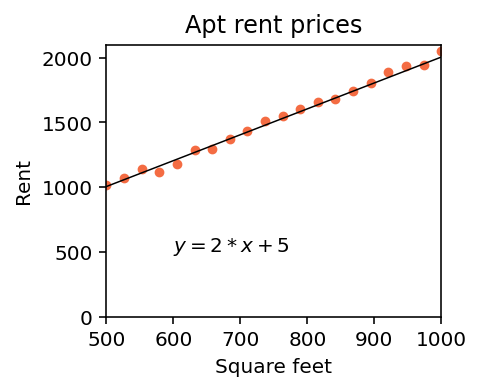

In [3]:
fig, ax = plt.subplots(figsize=(3,2.5))

ax.scatter(df.x, df.y, s=15, color='#F46C43')
ax.plot(df.x, 2 * df.x + 5, lw=.75, color='black')
ax.text(600,500, f"$y = 2*x + 5$")
ax.set_xlim(500,1000)
ax.set_ylim(0,2100)
ax.set_xlabel("Square feet")
ax.set_ylabel("Rent")
plt.title("Apt rent prices")

plt.show()

$y = \fbox{m} x + \fbox{b}$

or multiple

In [4]:
# brute force model parameter space search (m,b)
best = (1e100,0,0)
for m in np.linspace(1,3,num=5):
    for b in np.linspace(2,5,num=5):
        y = m * df.x + b
        mse = np.mean((y - df.y)**2)
        if mse < best[0]:
            best = (mse,m,b)
        print(f"{m:4.1f},{b:4.1f} => MSE {mse:.1f}")
print(f"BEST {best[1]:.2f}*x + {best[2]:.2f}")

 1.0, 2.0 => MSE 607252.2
 1.0, 2.8 => MSE 606109.4
 1.0, 3.5 => MSE 604967.8
 1.0, 4.2 => MSE 603827.2
 1.0, 5.0 => MSE 602687.8
 1.5, 2.0 => MSE 157600.5
 1.5, 2.8 => MSE 157020.2
 1.5, 3.5 => MSE 156441.1
 1.5, 4.2 => MSE 155863.0
 1.5, 5.0 => MSE 155286.1
 2.0, 2.0 => MSE 712.0
 2.0, 2.8 => MSE 694.2
 2.0, 3.5 => MSE 677.5
 2.0, 4.2 => MSE 662.0
 2.0, 5.0 => MSE 647.5
 2.5, 2.0 => MSE 136586.6
 2.5, 2.8 => MSE 137131.3
 2.5, 3.5 => MSE 137677.1
 2.5, 4.2 => MSE 138224.1
 2.5, 5.0 => MSE 138772.2
 3.0, 2.0 => MSE 565224.4
 3.0, 2.8 => MSE 566331.6
 3.0, 3.5 => MSE 567439.9
 3.0, 4.2 => MSE 568549.4
 3.0, 5.0 => MSE 569659.9
BEST 2.00*x + 5.00


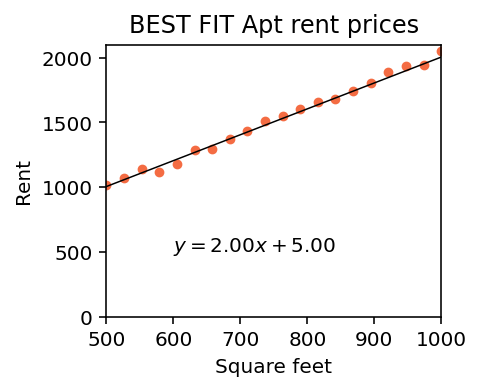

In [5]:
fig, ax = plt.subplots(figsize=(3,2.5))

ax.scatter(df.x, df.y, s=15, color='#F46C43')
ax.plot(df.x, best[1] * df.x + best[2], lw=.75, color='black')
ax.text(600,500, f"$y = {best[1]:.2f}x + {best[2]:.2f}$")
ax.set_xlim(500,1000)
ax.set_ylim(0,2100)
ax.set_xlabel("Square feet")
ax.set_ylabel("Rent")
plt.title("BEST FIT Apt rent prices")

plt.show()

## Nonlinear data

Try multiple linear models and run output into another linear model

In [6]:
# brute force model parameter space search (m1,b1,m2,b2,c1,c2)
best = 1e100
for m1 in np.linspace(1,3,num=5):
    for b1 in np.linspace(0,10,num=5):
        for m2 in np.linspace(1,3,num=5):
            for b2 in np.linspace(0,10,num=5):
                for c1 in np.linspace(-1,1,num=3):
                    for c2 in np.linspace(-1,1,num=3):
                        for b3 in np.linspace(0,1,num=2):
                            for b4 in np.linspace(0,1,num=2):
                                y1 = m1 * df.x + b1
                                y2 = m2 * df.x + b2
                                y  = (c1*y1 + b3) + (c2*y2 + b4)
                                mse = np.mean((y - df.y)**2)
                                if mse < best:
                                    best = mse
                                    print(f"Best {m1:4.1f},{b1:4.1f},{m2:4.1f},{b2:4.1f},{c1:4.1f},{b3:4.1f},{b4:4.1f},{c2:4.1f} => MSE {mse:.1f}")

Best  1.0, 0.0, 1.0, 0.0,-1.0, 0.0, 0.0,-1.0 => MSE 9465241.7
Best  1.0, 0.0, 1.0, 0.0,-1.0, 0.0, 1.0,-1.0 => MSE 9459214.2
Best  1.0, 0.0, 1.0, 0.0,-1.0, 1.0, 1.0,-1.0 => MSE 9453188.8
Best  1.0, 0.0, 1.0, 0.0,-1.0, 0.0, 0.0, 0.0 => MSE 5342543.6
Best  1.0, 0.0, 1.0, 0.0,-1.0, 0.0, 1.0, 0.0 => MSE 5338016.1
Best  1.0, 0.0, 1.0, 0.0,-1.0, 1.0, 1.0, 0.0 => MSE 5333490.6
Best  1.0, 0.0, 1.0, 0.0,-1.0, 0.0, 0.0, 1.0 => MSE 2390898.1
Best  1.0, 0.0, 1.0, 0.0,-1.0, 0.0, 1.0, 1.0 => MSE 2387870.6
Best  1.0, 0.0, 1.0, 0.0,-1.0, 1.0, 1.0, 1.0 => MSE 2384845.1
Best  1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0 => MSE 610305.2
Best  1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0 => MSE 608777.7
Best  1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0 => MSE 607252.2
Best  1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0 => MSE 765.0
Best  1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0 => MSE 737.5
Best  1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0 => MSE 712.0
Best  1.0, 0.0, 1.0, 2.5, 1.0, 0.0, 0.0, 1.0 => MSE 700.0
Best  1.0, 0.0, 1.0, 2.5, 1

KeyboardInterrupt: 

## Pytorch

### Noisy linear data

In [7]:
n = 20
df = pd.DataFrame()
df['x'] = np.linspace(500,1000,num=n)
noise = (np.random.random(size=n)-0.5)*100 # zero-centered noise
df['y'] = 2 * df.x + 5 + noise
df.head(10)

,x,y
0,500.000000,1009.752188
1,526.315789,1096.134789
2,552.631579,1082.578792
3,578.947368,1118.879329
4,605.263158,1201.973491
5,631.578947,1292.709773
6,657.894737,1363.218062
7,684.210526,1328.536855
8,710.526316,1393.903179
9,736.842105,1506.966095


In [8]:
import torch
import tsensor

X = torch.tensor(df.x).reshape(n,1)
Y = torch.tensor(df.y).reshape(n,1)

# Randomly initialize weights
m = torch.randn(1, 1, requires_grad=True)  # <-- track for autograd
b = torch.randn(1, 1, requires_grad=True)

tolerance = 809
learning_rate = .001
optimizer = torch.optim.Adam([m,b], lr=learning_rate)
nepochs=50000
for epoch in range(nepochs+1):
    # Forward pass over all x,y pairs: compute predicted y
    with tsensor.clarify():
        y_pred = m * X + b
#         y_pred = y_pred.T
        loss = torch.mean((y_pred - Y)**2)
    if loss < tolerance:
        break
    if epoch % 500 == 0:
        with torch.no_grad():
            mae = torch.mean(torch.abs(y_pred - Y))
            print(f"Epoch {epoch:5d} {m.detach().item():4.2f},{b.detach().item():4.2f}: MSE loss {loss:12.3f} MAE {mae:8.2f}")

    # Backprop to compute gradients of w1, w2, ... with respect to loss
    optimizer.zero_grad()
    loss.backward() # autograd computes w1.grad, b1.grad, ...
    optimizer.step()
m = m.detach().item()
b = b.detach().item()
print(f"LAST       {m:4.2f},{b:4.2f}: MSE loss {loss:12.3f} MAE {mae:8.2f}")

Epoch     0 2.40,0.94: MSE loss    93969.056 MAE   299.20
Epoch   500 2.07,0.61: MSE loss     3337.541 MAE    48.96
Epoch  1000 2.01,0.55: MSE loss      956.398 MAE    28.32
Epoch  1500 2.00,0.54: MSE loss      953.164 MAE    28.12
Epoch  2000 2.00,0.54: MSE loss      953.163 MAE    28.12
Epoch  2500 2.00,0.54: MSE loss      953.162 MAE    28.12
Epoch  3000 2.00,0.53: MSE loss      953.160 MAE    28.12
Epoch  3500 2.00,0.53: MSE loss      953.157 MAE    28.12
Epoch  4000 2.00,0.52: MSE loss      953.154 MAE    28.12
Epoch  4500 2.00,0.51: MSE loss      953.150 MAE    28.12
Epoch  5000 2.00,0.50: MSE loss      953.145 MAE    28.12
Epoch  5500 2.00,0.49: MSE loss      953.138 MAE    28.12
Epoch  6000 2.00,0.47: MSE loss      953.129 MAE    28.12
Epoch  6500 2.01,0.45: MSE loss      953.118 MAE    28.12
Epoch  7000 2.01,0.42: MSE loss      953.103 MAE    28.12
Epoch  7500 2.01,0.39: MSE loss      953.085 MAE    28.12
Epoch  8000 2.01,0.34: MSE loss      953.062 MAE    28.12
Epoch  8500 2.

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(figsize=(3,2.5))

ax.scatter(df.x, df.y, s=15, color='#F46C43')
ax.plot(df.x, m * df.x + b, lw=.75, color='black')
ax.text(600,500, f"$y = {m:.2f}x + {b:.2f}$")
ax.set_xlim(500,1000)
ax.set_ylim(0,2100)
ax.set_xlabel("Square feet")
ax.set_ylabel("Rent")
plt.title("BEST FIT Apt rent prices")

plt.show()

## Cars

In [ ]:
df_cars = pd.read_csv("../data/cars.csv")
df_cars.head(2)

#### Brute force

In [ ]:
# brute force model parameter space search (m,b)
best = (1e100,0,0)
for m in np.linspace(-0.005,-.01,num=100):
    for b in np.linspace(42,47,num=10):
        y = m * df_cars.WGT + b
        mse = np.mean((y - df_cars.MPG)**2)
        if mse < best[0]:
            best = (mse,m,b)
#         print(f"{m:4.3f},{b:4.3f} => MSE {mse:.1f}")
m = best[1]
b = best[2]
print(f"BEST {m:.3f}*x + {b:.3f}")

In [ ]:
fig, ax = plt.subplots(figsize=(4,3))

ax.scatter(df_cars.WGT, df_cars.MPG, s=15, color='#F46C43', alpha=.5)
ax.plot(df_cars.WGT, m * df_cars.WGT + b, lw=.5, color='black')
ax.text(3000,45, f"$y = {m:.3f}x + {b:.2f}$")
# ax.set_xlim(500,1000)
# ax.set_ylim(0,2100)
ax.set_xlabel("Weight")
ax.set_ylabel("MPG")

plt.show()

#### Linear model with pytorch

In [ ]:
import torch
import tsensor

n = len(df_cars)
X = torch.tensor(df_cars.WGT).reshape(n,1)
Y = torch.tensor(df_cars.MPG).reshape(n,1)

# Randomly initialize weights
m = torch.randn(1, 1, requires_grad=True)  # <-- track for autograd
b = torch.randn(1, 1, requires_grad=True)

tolerance = 18.7
learning_rate = .03
optimizer = torch.optim.Adam([m,b], lr=learning_rate)
nepochs=50000
for epoch in range(nepochs+1):
    # Forward pass over all x,y pairs: compute predicted y
    with tsensor.clarify():
        y_pred = m * X + b
#         y_pred = y_pred.T
        loss = torch.mean((y_pred - Y)**2)
    if loss < tolerance:
        break
    if epoch % 500 == 0:
        with torch.no_grad():
            mae = torch.mean(torch.abs(y_pred - Y))
            print(f"Epoch {epoch:5d} {m.detach().item():4.2f},{b.detach().item():4.2f}: MSE loss {loss:12.3f} MAE {mae:8.2f}")

    # Backprop to compute gradients of w1, w2, ... with respect to loss
    optimizer.zero_grad()
    loss.backward() # autograd computes w1.grad, b1.grad, ...
    optimizer.step()
m = m.detach().item()
b = b.detach().item()
print(f"LAST       {m:4.2f},{b:4.2f}: MSE loss {loss:12.3f} MAE {mae:8.2f}")

In [ ]:
fig, ax = plt.subplots(figsize=(4,3))

ax.scatter(df_cars.WGT, df_cars.MPG, s=15, color='#F46C43', alpha=.5)
ax.plot(df_cars.WGT, m * df_cars.WGT + b, lw=.5, color='black')
ax.text(3000,45, f"$y = {m:.3f}x + {b:.2f}$")
# ax.set_xlim(500,1000)
# ax.set_ylim(0,2100)
ax.set_xlabel("Weight")
ax.set_ylabel("MPG")

plt.show()

### Concave down one layer of one neuron

Predicts line at angle, sometimes flat. MSE is about 3ish

In [ ]:
n = 20
df = pd.DataFrame()
df['x'] = np.linspace(500,1000,num=n)
df['y'] = ((1-(df.x-750)**2)/50 + 1250)/1250
df.head(10)

In [ ]:
fig, ax = plt.subplots(figsize=(3,2.5))

ax.scatter(df.x, df.y, s=15, color='#F46C43')
ax.set_xlim(500,1000)
ax.set_xlabel("Square feet")
ax.set_ylabel("Interest in apt")
plt.title("Apt interest level")

plt.show()

In [ ]:
import torch
import tsensor

X = torch.tensor(df.x).reshape(n,1)
Y = torch.tensor(df.y).reshape(n,1)

# Randomly initialize weights
m = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

tolerance = 0#3.15
learning_rate = .01
optimizer = torch.optim.Adam([m,b], lr=learning_rate)
nepochs=2000
for epoch in range(nepochs+1):
    # Forward pass over all x,y pairs: compute predicted y
    with tsensor.clarify():
        y_pred = m * X + b
        loss = torch.mean((y_pred - Y)**2)
    if loss < tolerance:
        break
    if epoch % 200 == 0:
        with torch.no_grad():
            mae = torch.mean(torch.abs(y_pred - Y))
            print(f"Epoch {epoch:5d} {m.detach().item():4.2f},{b.detach().item():4.2f}: MSE loss {loss:12.3f} MAE {mae:8.2f}")

    # Backprop to compute gradients of w1, w2, ... with respect to loss
    optimizer.zero_grad()
    loss.backward() # autograd computes w1.grad, b1.grad, ...
    optimizer.step()
m = m.detach().item()
b = b.detach().item()
print(f"LAST        {m:4.2f},{b:4.2f}: MSE loss {loss:12.3f} MAE {mae:8.2f}")

In [ ]:
fig, ax = plt.subplots(figsize=(4,2.5))

y_pred = m * df.x + b
        
ax.scatter(df.x, df.y, s=15, color='#F46C43')
ax.plot(df.x, y_pred, lw=.75, color='black')
ax.text(650,0, f"$y = {m:4.4f}x+{b:4.2f}$")
ax.text(750,.25, f"$loss = {loss:.4f}$", horizontalalignment="center")
ax.set_xlim(500,1000)
# ax.set_ylim(-.1,1.05)
ax.set_xlabel("Square feet")
ax.set_ylabel("Interest in apt")
plt.title("BEST FIT Apt interest level")

plt.show()

### Concave down two layers, two neurons then one neuron

Should predict flat line at mean (ish?). Seems to get flat line more often and with less loss than one neuron.

In [ ]:
n = 20
df = pd.DataFrame()
df['x'] = np.linspace(500,1000,num=n)
df['y'] = ((1-(df.x-750)**2)/50 + 1250)/1250
df.head(3)

In [ ]:
import torch
import tsensor

X = torch.tensor(df.x, dtype=dtype).reshape(n,1)
X = (X-torch.mean(X))/torch.std(X)
Y = torch.tensor(df.y, dtype=dtype).reshape(n,1)

# Randomly initialize weights
m1 = torch.randn(10, 1, dtype=dtype, requires_grad=True) # 2 neurons in layer 1
b1 = torch.randn(10, 1, dtype=dtype, requires_grad=True)
m2 = torch.randn(1, 10, dtype=dtype, requires_grad=True) # 1 neuron in layer 2
b2 = torch.randn(1, 1, dtype=dtype, requires_grad=True)

tolerance = 0
learning_rate = .001
optimizer = torch.optim.Adam([m1,b1,m2,b2], lr=learning_rate)
nepochs=15000
for epoch in range(nepochs+1):
    # Forward pass over all x,y pairs: compute predicted y
    with tsensor.clarify():
        o = m1 @ X.T + b1
        o = torch.relu(o)
        y_pred = m2 @ o + b2
        y_pred = y_pred.T
        loss = torch.mean((y_pred - Y)**2)
    if loss < tolerance:
        break
    if epoch % 1000 == 0:
        with torch.no_grad():
            mae = torch.mean(torch.abs(y_pred - Y))
            print(f"Epoch {epoch:5d} MSE loss {loss.detach().item():12.4f} MAE {mae:8.2f}")

    # Backprop to compute gradients of w1, w2, ... with respect to loss
    optimizer.zero_grad()
    loss.backward() # autograd computes w1.grad, b1.grad, ...
    optimizer.step()
m1 = m1.detach()
b1 = b1.detach()
m2 = m2.detach()
b2 = b2.detach()
print(f"LAST        MSE loss {loss.detach().item():12.4f} MAE {mae:8.2f}")

In [ ]:
fig, ax = plt.subplots(figsize=(4,2.5))

y_pred = y_pred.detach()

# with tsensor.explain():
#     o = m1 @ X.T + b1
#     o = torch.relu(o)
#     y_pred = m2 @ o + b2
#     y_pred = y_pred.T

loss = torch.mean((y_pred - Y)**2)
print("Loss", loss)
        
ax.scatter(df.x, df.y, s=15, color='#F46C43')
ax.plot(df.x, y_pred, lw=.75, color='black')
# ax.text(525,-.18, f"$y = {m2:4.4f}*relu({m1:4.2f}x+{b1:4.2f}) + {b2:4.2f}$")
ax.text(750,.25, f"$loss = {loss:.4f}$", horizontalalignment="center")
ax.set_xlim(500,1000)
ax.set_ylim(-.25,1.05)
ax.set_xlabel("Square feet")
ax.set_ylabel("Interest in apt")
plt.title("BEST FIT Apt interest level")

plt.show()

# Plot loss surface

In [9]:
    
def loss_surface(x,y,m,b):
    pass


In [249]:
df_cars = pd.read_csv("../data/cars.csv")
df_cars.head(2)

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693


In [253]:
n = len(df_cars)
X = np.array(df_cars.WGT).reshape(n,1)
y = np.array(df_cars.MPG)#.reshape(n,1)

In [305]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import colors 

def loss(X,y,m,b):
    y_pred = m * X + b
#     return mean_squared_error(y, y_pred)
    return np.mean((y.reshape(-1,1)-y_pred.reshape(-1,1))**2)

def linmodel_coeff(X,y):
    lm = LinearRegression(normalize=False, fit_intercept=True)
    lm.fit(X, y)
    b = lm.intercept_
    m = lm.coef_[0]
    return m,b

def grid_pairs(mrange, brange, n=100):
    pairs = [(m,b) for m in np.linspace(*mrange,num=n)
                   for b in np.linspace(*brange,num=n)]
    return np.array(pairs)

def loss_plot(m, b, z, truth=None, maxz=.8, ax=None):
    cmap = plt.get_cmap('coolwarm')
    norm = colors.Normalize(min(z),max(z)*maxz)
    if ax is None:
        fig, ax = plt.subplots(figsize=(4,3))
    if truth:
        tm,tb = truth
        ax.plot(tm, tb, 'x', ms=10, c='k')
    ax.scatter(m, b, s=30, c=cmap(norm(z)), alpha=1, marker='s')
    ax.set_xlabel("Slope m")
    ax.set_ylabel("Y-intercept b")
    ax.set_title("MSE linear model loss function")

def show(X, y, m, b, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(4,3))

    ax.scatter(X, y, s=15, color='#F46C43', alpha=.5)
    ax.plot(X, m * X + b, lw=.5, color='black')
    ax.set_title(f"$y = {m:.3f}x + {b:.2f}$")
    if sum(X)/len(X)<1.0:
        ax.set_xlabel("Weight (Standardized)")
    else:
        ax.set_xlabel("Weight")
    ax.set_ylabel("MPG")

In [306]:
def explain(X, y, mrange, brange, normalize=False):
    if normalize:
        X = (X-np.mean(X))/np.std(X)

    fig, axes = plt.subplots(1, 2, figsize=(8,3))
    m,b = linmodel_coeff(X,y)
    print(f"m = {m:.2f}, b = {b:.2f}")    
    pairs = grid_pairs(mrange, brange, n=50)
    z = np.array([loss(X,y,*pair) for pair in pairs])
    loss_plot(pairs[:,0], pairs[:,1], z, truth=(m,b), ax=axes[0])
    show(X, y, m, b, ax=axes[1])

m = -0.01, b = 46.22


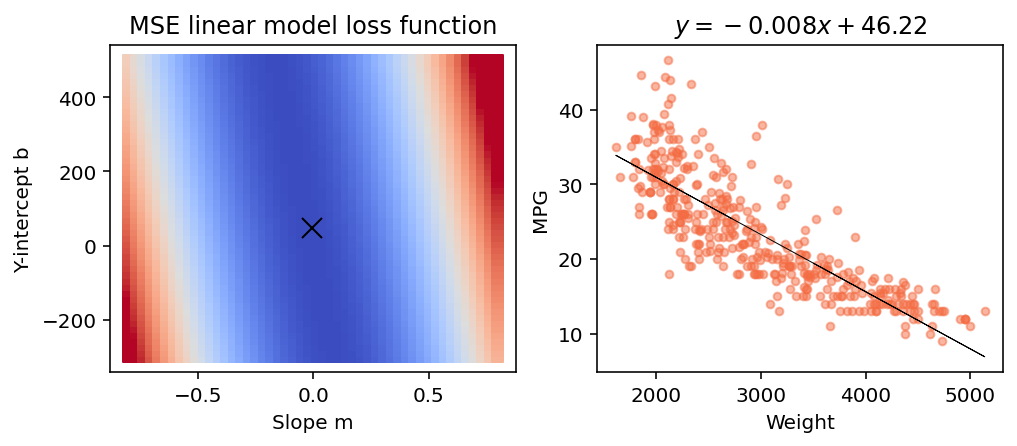

In [307]:
explain(X, y, mrange = (-.8,.8), brange = (-300,500))

m = -6.49, b = 23.45


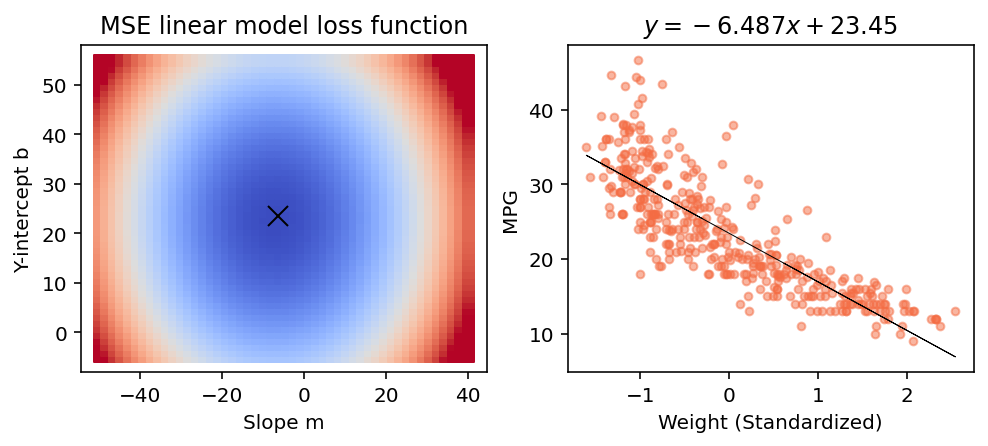

In [287]:
explain(X, y,
        mrange = (-50,40), brange = (-5,55),
        normalize=True)

In [229]:
loss(X_,y,m,b), loss(X_,y,0,b)

(102.84885839539338, 60.762737400161704)

In [178]:
min(z), max(z), norm(65)

(61.02359641759713, 1990.8819891602043, 1.443919498738721e-06)

m = -0.01, b = 46.22


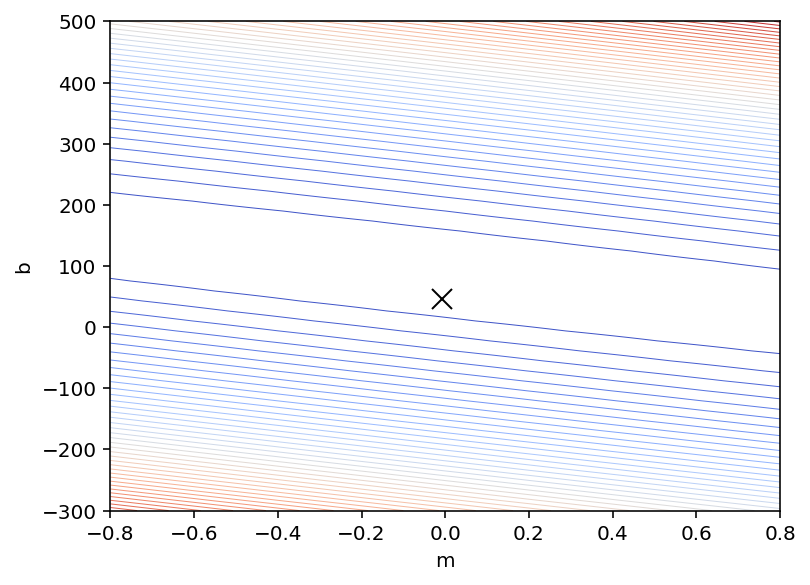

In [299]:
# can't get this to look right
mrange = (-.8,.8)
brange = (-300,500)
pairs = grid_pairs(mrange, brange, n=50)
z = np.array([loss(X,y,*pair) for pair in pairs])
gridx, gridy = np.meshgrid(np.linspace(*mrange,num=50),
                           np.linspace(*brange,num=50),
                           indexing='xy')

fig, ax = plt.subplots(1,1,figsize=(6,4.5))
ax.contour(gridx, gridy, z.reshape(gridx.shape), levels=50, linewidths=.5, cmap='coolwarm')
m,b = linmodel_coeff(X,y)
print(f"m = {m:.2f}, b = {b:.2f}")  
ax.plot(m, b, 'x', ms=10, c='k')
ax.set_xlabel("m")
ax.set_ylabel("b")
plt.show()

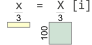

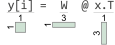

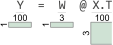

In [21]:
import torch
import tsensor

W = torch.randn(1, 3)

x = torch.randn(1, 3)
X = torch.randn(100, 3)
i = 0
y = torch.randn(3,1)

with tsensor.explain() as e:
    x = X[i]
    x = x.reshape(1,3)
    y[i] = W @ x.T
    Y = W @ X.T

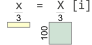

In [22]:
e.views[0]

In [23]:
e.views[0].savefig("/Users/parrt/Desktop/get-x.svg")
e.views[2].savefig("/Users/parrt/Desktop/one-x.svg")
e.views[3].savefig("/Users/parrt/Desktop/vectorized.svg")